Analyzing weather related data in Argentina.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Retrieving the data.
path = '/workspaces/Codespace-playground/Datos+Meteorológicos_Arg_2023.csv'
data = pd.read_csv(path)

In [ ]:
#Dataframe generation and preeliminar visualization
df = pd.DataFrame(data)
df.head()

,Fecha,Ciudad,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa
0,1/1/2023,Buenos Aires,27,18,0.0,22.7,68.8
1,1/1/2023,Cordoba,35,18,0.0,33.8,61.7
2,1/1/2023,Rosario,23,21,0.0,10.6,80.0
3,1/1/2023,Mendoza,35,21,0.0,23.8,76.8
4,1/1/2023,Tucuman,36,18,17.2,25.7,54.9


In [8]:
#First, I will treat the data.  Let's check the datatype of the 'Fecha' column.
print(df['Fecha'].dtype)

object


In [ ]:
#since it is an object, I will convert it to datetime.
df['Fecha'] = pd.to_datetime(df['Fecha'], format = '%d/%m/%Y')

In [10]:
df.head()

,Fecha,Ciudad,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa
0,2023-01-01,Buenos Aires,27,18,0.0,22.7,68.8
1,2023-01-01,Cordoba,35,18,0.0,33.8,61.7
2,2023-01-01,Rosario,23,21,0.0,10.6,80.0
3,2023-01-01,Mendoza,35,21,0.0,23.8,76.8
4,2023-01-01,Tucuman,36,18,17.2,25.7,54.9


In [ ]:
#Defining the cities
cities = []
for city in df['Ciudad']:
    if city not in cities:
        cities.append(city)
cities

['Buenos Aires', 'Cordoba', 'Rosario', 'Mendoza', 'Tucuman']

In [12]:
dict_months = {
    1: 'Enero',
    2: 'Febrero',
    3: 'Marzo',
    4: 'Abril',
    5: 'Mayo',
    6: 'Junio',
    7: 'Julio',
    8: 'Agosto',
    9: 'Septiembre',
    10: 'Octubre',
    11: 'Noviembre',
    12: 'Diciembre'
}

In [17]:
def temperature_registration():
    while True:
        print('\n Available cities:', cities)
        selected_city = input('Enter the city you want to check the temperature registration: ').title()
        #Selecting month
        selected_month = int(input('Enter the month you want to check the temperature registration (i.e 1 for January, 2 for February,etc): '))
        #checking if the entered values are correct
        if selected_city not in cities or selected_month not in dict_months.keys():
            print('Invalid city or month. Please try again.')
            continue
        #Creating the filtered dataframe
        filtered_df = df[(df['Ciudad'] == selected_city) & (df['Fecha'].dt.month == selected_month)]
        #Plotting the data
        plt.figure(figsize = (12,6))
        plt.plot(filtered_df['Fecha'], filtered_df['Temperatura Maxima'], label = 'Maximum Temperature', color = 'red')
        plt.plot(filtered_df['Fecha'], filtered_df['Temperatura Minima'], label = 'Minimum Temperature', color = 'blue')
        plt.title(f'{selected_city} - {dict_months[selected_month]}')
        plt.xlabel('Date')
        plt.ylabel('Temperature (°C)')
        plt.legend()
        plt.show()

        #Asking the user if they want to check another city
        another = input('Do you want to check another city? (yes/no): ')
        if another.lower() != 'yes':
            break


 Available cities: ['Buenos Aires', 'Cordoba', 'Rosario', 'Mendoza', 'Tucuman']


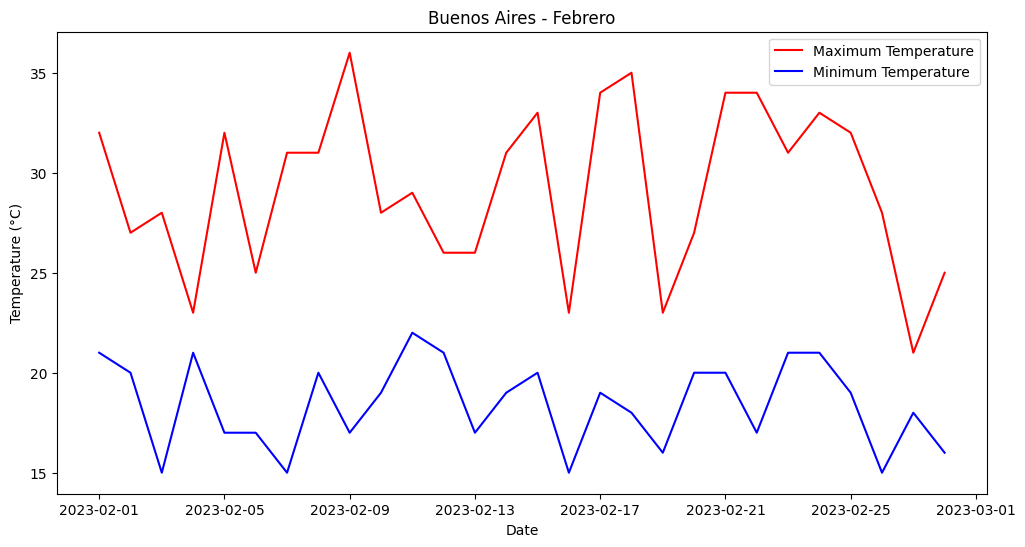


 Available cities: ['Buenos Aires', 'Cordoba', 'Rosario', 'Mendoza', 'Tucuman']


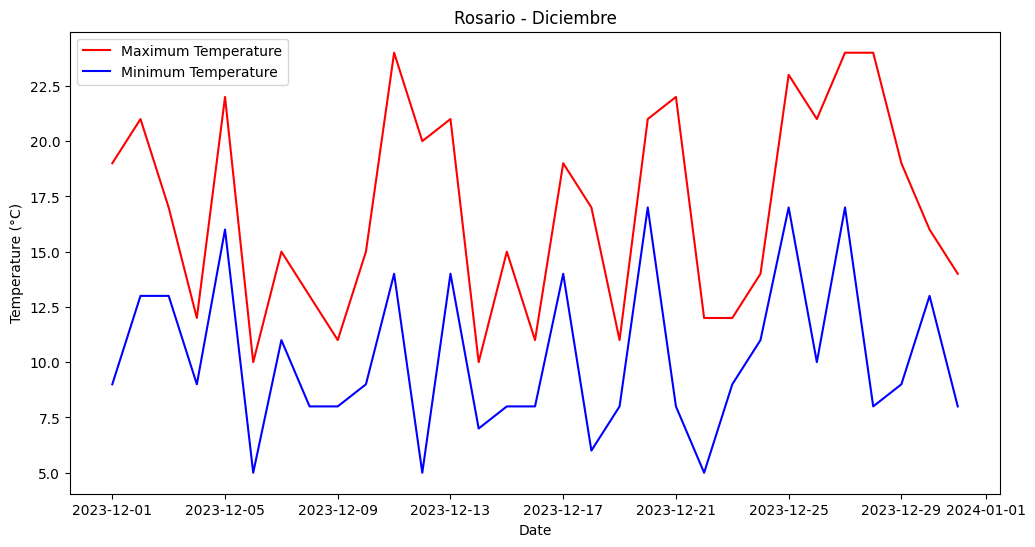

In [18]:
temperature_registration()